## Bolus Glucose Control in Type 1 Diabetes Using Deep Reinforcement Learning
### Results for the "Adolescent Model"
Raphael Joost, 18-109-504 & Yanis Schärer, 18-114-058

In [19]:
from Agent import DDPGAgent
from utils import make_env
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

#### Create environment of average adolescent

In [2]:
average_adolescent = make_env('simglucose_average', 'average_adolescent')

State space:
 Dict('CGM': Box(0.0, 10000.0, (6,), float32), 'CHO': Box(0.0, 10000.0, (6,), float32), 'insulin': Box(0.0, 10000.0, (6,), float32))
Action space:
 Box(0.2, 2.0, (3,), float32)


Explore environment

In [3]:
sample_observation, sample_info = average_adolescent.reset() # Reset environment and get initial observation
sample_action = average_adolescent.action_space.sample() # Sample a random action

print('Environment info:\n', sample_info, '\n')
print('Observation (flattened):\n', sample_observation, '\n')
print('Action:\n', sample_action, '\n')

Environment info:
 {'time': datetime.datetime(2018, 1, 1, 21, 50), 'meal': 0, 'patient_name': 'average_adolescent', 'sample_time': 3.0} 

Observation (flattened):
 [149.96591 149.96591 149.96591 149.96591 149.96591 149.96591   0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.     ] 

Action:
 [0.2900143  0.26484588 1.3074008 ] 



#### Initialize DDPG agent

In [4]:
agent = DDPGAgent(average_adolescent)

#### Train agent
Train agent on average patient (This is done on UBELIX). The state of the actor and critic networks are saved in the folder 'agent_state'.
```python
_ = agent.general_training()
````

Load trained agent

In [21]:
agent.load_agent('agent_state')

Agent loaded from folder agent_state


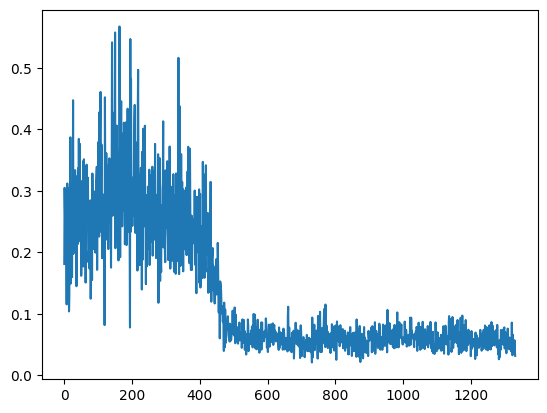

In [6]:
with open(os.path.join('','general_training_loss.json')) as f:
    critic_loss = json.load(f)

plt.plot([x[0] for x in critic_loss])
plt.show()

#### Evaluate agent
Evaluate policy on average adolescent

Episode finished after 185 timesteps (patient died).
Episode finished.


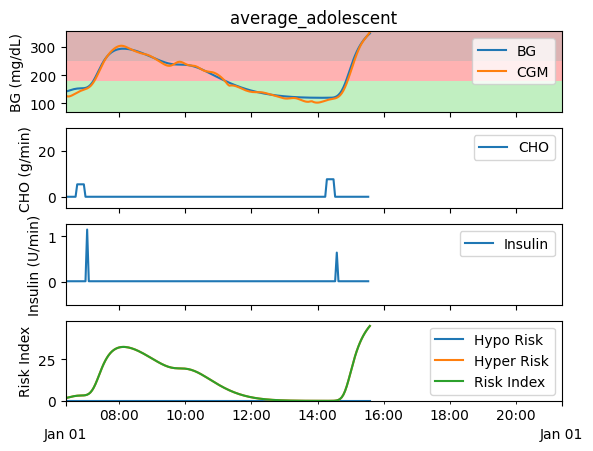

In [22]:
# Load and plot the critic loss
metrics = agent.evaluate_policy(render=True)
# Do something with metrics

In [23]:
print(metrics['actor_output'])

[(datetime.datetime(2018, 1, 1, 7, 2), array([0.31928703, 1.8646736 , 1.988042  ], dtype=float32)), (datetime.datetime(2018, 1, 1, 14, 35), array([0.4337148, 1.7767122, 1.9678531], dtype=float32))]


Evaluate agent on the 10 given adolescents

In [9]:
envs = [make_env(f'simglucose_ado_0{i:02d}', f'adolescent#0{i:02d}', print_space=False) for i in range(1,11)]

  0%|          | 0/10 [00:00<?, ?it/s]c:\Users\yanis\anaconda3\envs\simgl\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[ 7.91229233  0.90489338 -0.        ]


 10%|█         | 1/10 [00:20<03:05, 20.64s/it]c:\Users\yanis\anaconda3\envs\simgl\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[ 6.43758867  0.29272193 -0.        ]


 20%|██        | 2/10 [00:41<02:45, 20.65s/it]c:\Users\yanis\anaconda3\envs\simgl\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[3.0802905 0.5869153 0.       ]


 30%|███       | 3/10 [01:16<03:10, 27.19s/it]

[ 1.71697028 -0.11714148  0.        ]


 40%|████      | 4/10 [01:51<03:02, 30.40s/it]c:\Users\yanis\anaconda3\envs\simgl\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[4.76246152 0.92203613 0.        ]


 50%|█████     | 5/10 [02:22<02:32, 30.49s/it]c:\Users\yanis\anaconda3\envs\simgl\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[ 5.78463204 -0.40891481 -0.        ]


 60%|██████    | 6/10 [02:34<01:36, 24.16s/it]

[1.40367893 0.95161723 0.        ]
[ 2.4131536   3.00144464 -0.        ]
[ 2.0327477  1.3862699 -0.       ]
[ 1.65270776  0.61429313 -0.        ]


 70%|███████   | 7/10 [04:37<02:49, 56.59s/it]

[ 3.64095776 -0.61418843 -0.        ]


 80%|████████  | 8/10 [04:45<01:22, 41.02s/it]

[5.94356781 0.29457781 0.        ]


 90%|█████████ | 9/10 [05:05<00:34, 34.49s/it]c:\Users\yanis\anaconda3\envs\simgl\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[ 1.16394503  0.02407701 -0.        ]


100%|██████████| 10/10 [05:19<00:00, 31.91s/it]


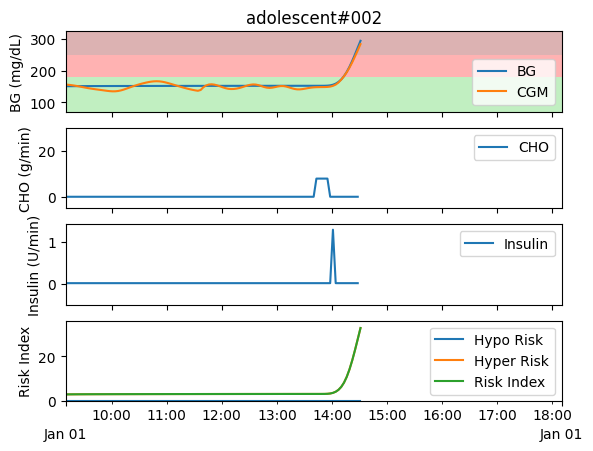

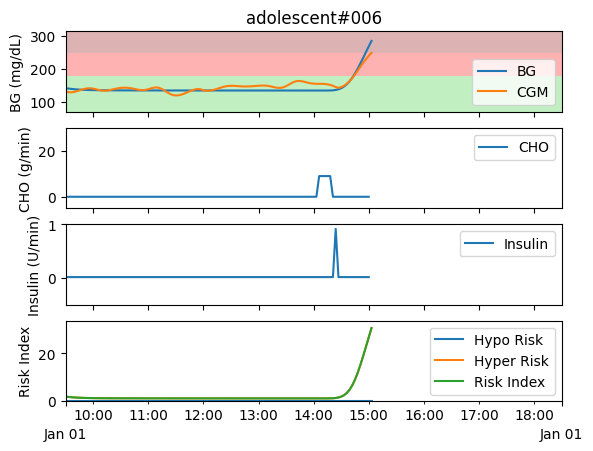

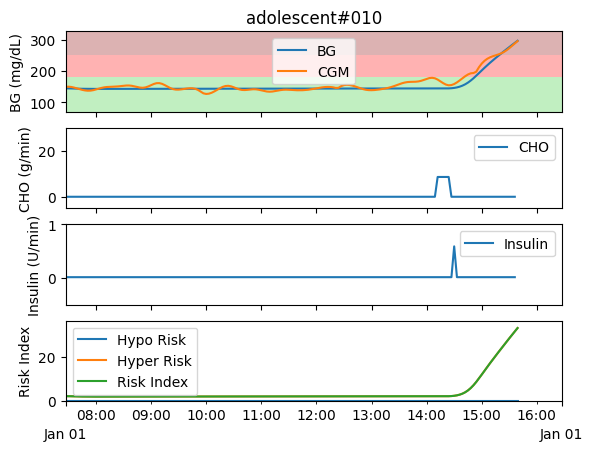

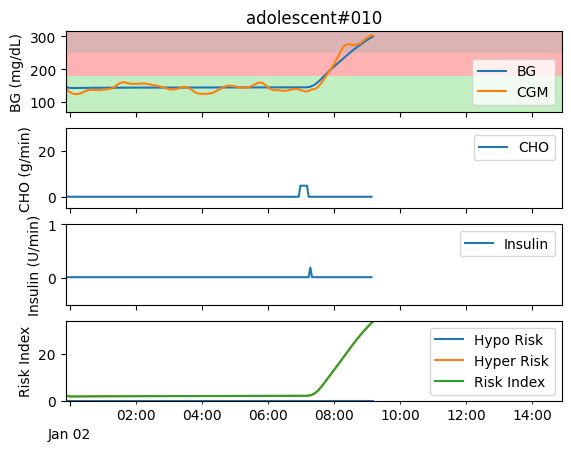

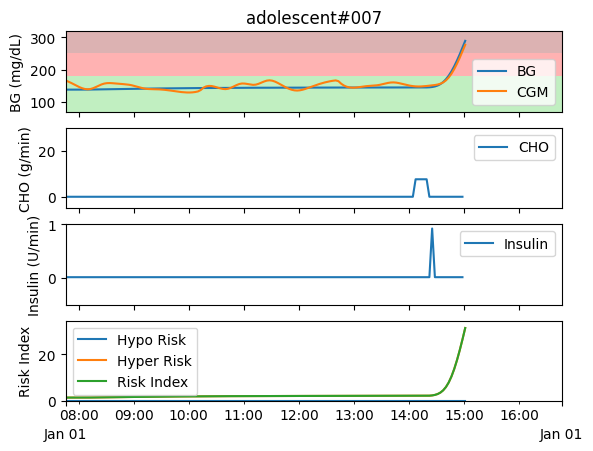

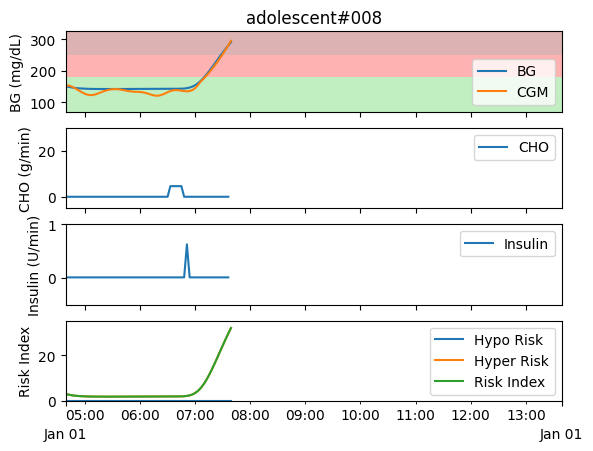

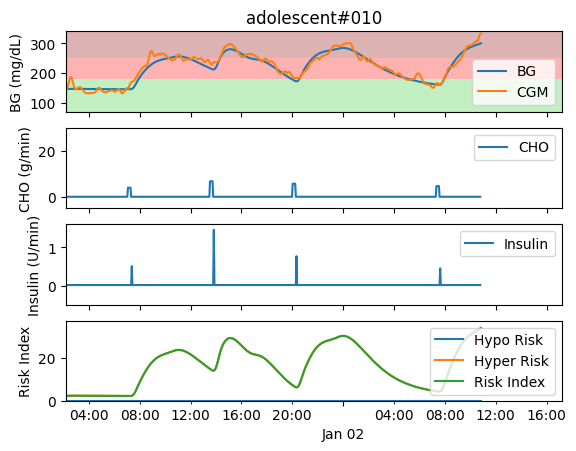

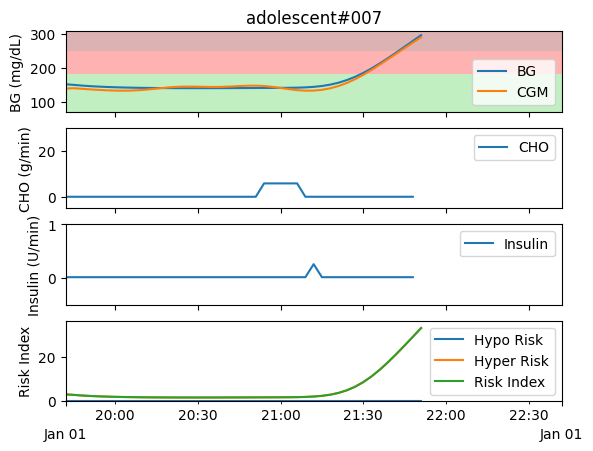

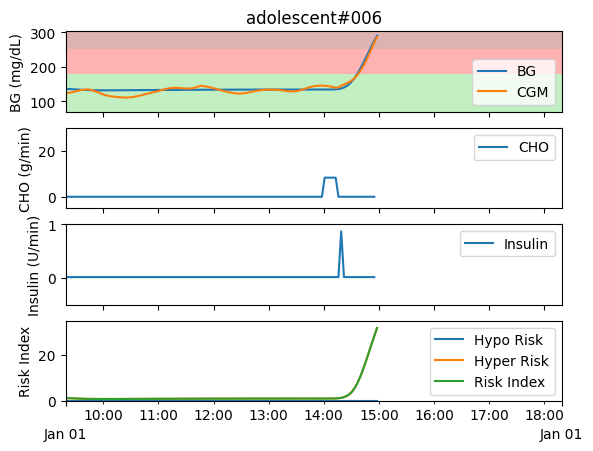

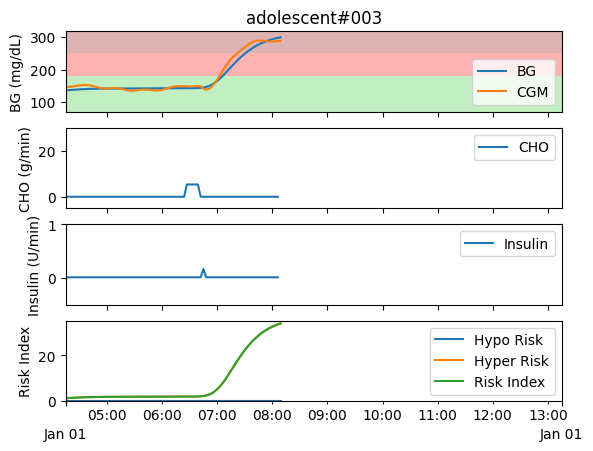

In [10]:
metrics = []
for i in tqdm(range(10)):
    rand_env = random.choice(envs)
    agent.change_env(rand_env)
    m = agent.evaluate_policy(print_output=False)
    metrics.append(m)

In [20]:
TIRs = np.array([m['TIR'] for m in metrics])
print(f'TIR: {TIRs.mean():.2f} +/- {TIRs.std():.2f}')
print(f'Patient survived {sum([m["is_alive"] for m in metrics])}/{len(metrics)} times')

NameError: name 'TIRs' is not defined

#### Fine-tune agent
Fine-tune on a specific patient (e.g. 'adolescent#001')

In [7]:
individual_patient = envs[0]
agent.change_env(individual_patient)

State space:
 Dict('CGM': Box(0.0, 10000.0, (6,), float32), 'CHO': Box(0.0, 10000.0, (6,), float32), 'insulin': Box(0.0, 10000.0, (6,), float32))
Action space:
 Box(0.2, 2.0, (3,), float32)


Personalized training is done on UBELIX, the state of the actor and critic networks are loaded below.
```python
_ = agent.personalized_training(individual_patient)
```
#### Evaluate agent

c:\Users\yanis\anaconda3\envs\simgl\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[2.4570494  1.63401099 0.        ]
[ 1.75675949 -0.93145616 -0.        ]
[ 2.91523645 -2.35892276 -0.        ]
[ 2.50347373  1.34245328 -0.        ]
[ 1.89559258 -1.66805627 -0.        ]
[ 2.50356995  0.41158279 -0.        ]
Episode finished.


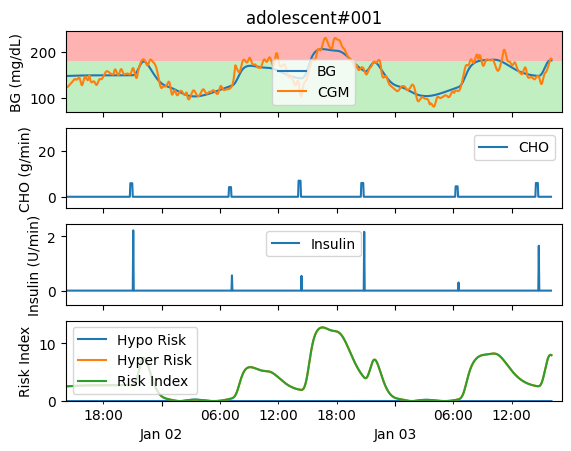

In [9]:
# agent.load_agent('agent_state_finetuned')
# Load and plot the critic loss
metrics = agent.evaluate_policy(render=True)
# Do something with the metrics

In [ ]:
metrics = []
for i in tqdm(range(10)):
    m = agent.evaluate_policy(print_output=False)
    metrics.append(m)

In [ ]:
TIRs = np.array([m['TIR'] for m in metrics])
print(f'TIR: {TIRs.mean():.2f} +/- {TIRs.std():.2f}')
print(f'Patient survived {sum([m["is_alive"] for m in metrics])}/{len(metrics)} times')